## Urban air pollution project


### TOC (table of content)
1. [Load packages](#loading_packages)
2. [Load data](#loading_data)
3. [EDA technical](#technical_eda)
4. [Hypothesis](#hypothesis)

5. [Feature engineering](#feature_engineering)


<a id='loading_packages'/>

Loading packages

In [66]:
import pandas as pd
import numpy as np

from time import time

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
# from sklearn.inspection import plot_partial_dependence

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
# Import functions from own Python-File (see visuals_script.py in Repo)
#import visuals_script as vs
from sklearn.decomposition import PCA
from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
# Pretty display for notebooks
%matplotlib inline

from sklearn.ensemble import AdaBoostRegressor

import lightgbm as lgb

import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
RSEED=42


## TOC
### Import data

<a id='loading_data'/>

Loading Data

In [67]:
df = pd.read_csv('data/Train.csv')

<a id='technical_eda'/>

EDA Technical

In [68]:
pd.set_option('display.max_rows',10)
df.columns


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [69]:
df.shape

(30557, 82)

In [70]:
df.dtypes

Place_ID X Date                  object
Date                             object
Place_ID                         object
target                          float64
target_min                      float64
                                 ...   
L3_CH4_aerosol_optical_depth    float64
L3_CH4_sensor_azimuth_angle     float64
L3_CH4_sensor_zenith_angle      float64
L3_CH4_solar_azimuth_angle      float64
L3_CH4_solar_zenith_angle       float64
Length: 82, dtype: object

In [71]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [72]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [74]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

#### check outliers for target

<Axes: xlabel='target', ylabel='Count'>

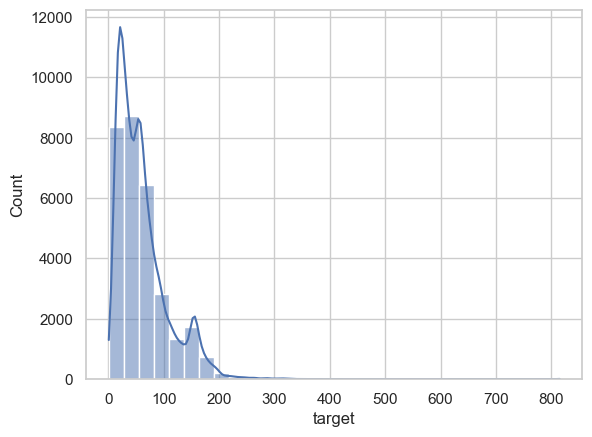

In [75]:
sns.histplot(df, x='target', bins=30, kde=True)

<Axes: >

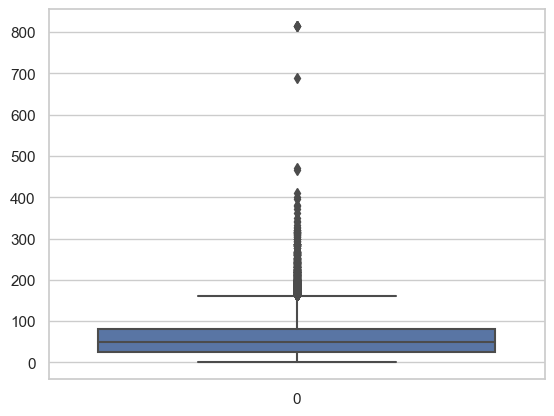

In [76]:
sns.boxplot(df['target'])

we see that the data are exponentially distributed. The box plot shows very high amount of outliers. However, because of the exponential distribution, we can log transfor the target value to reduce the number of 'actual' outliers.

<Axes: >

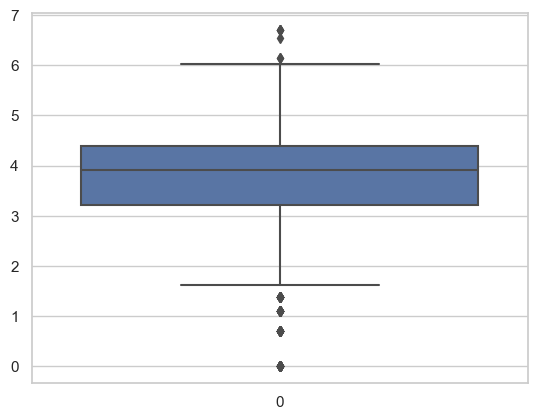

In [77]:
sns.boxplot(df['target'].apply(np.log))

Conclusion is we need to set the treshold: the following code calculates the maximum value for the target that we will use for the training. (this is: we remove the highest seven points).

In [78]:
q1=df['target'].apply(np.log).quantile(0.25)
q3=df['target'].apply(np.log).quantile(0.75)
IQR=q3-q1
max_target = np.exp((q3+1.5*IQR)) 
print(max_target)

457.9467217919567


Hypothsis
<a id='hypothesis'/>

- higher gas column densities, higher target value
- Q: higher wind velocity, lower target value?
    A: true
- humidity correlated non-linearly with target value
- satellite angle correlates with measured column density
- stratospheric column density no correlation with target value
- aerosol index with target value
- AER_AI_sensor_altitude  nega-corr target value

H1: higher gas column densities, higher target value

In [79]:
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

target                                             1.000000
target_min                                         0.818803
target_max                                         0.630801
L3_CO_CO_column_number_density                     0.375737
L3_HCHO_tropospheric_HCHO_column_number_density    0.347125
                                                     ...   
L3_HCHO_solar_azimuth_angle                       -0.181548
L3_O3_solar_azimuth_angle                         -0.185363
L3_CLOUD_solar_azimuth_angle                      -0.187643
L3_AER_AI_solar_azimuth_angle                     -0.193434
L3_AER_AI_sensor_altitude                         -0.308308
Name: target, Length: 79, dtype: float64

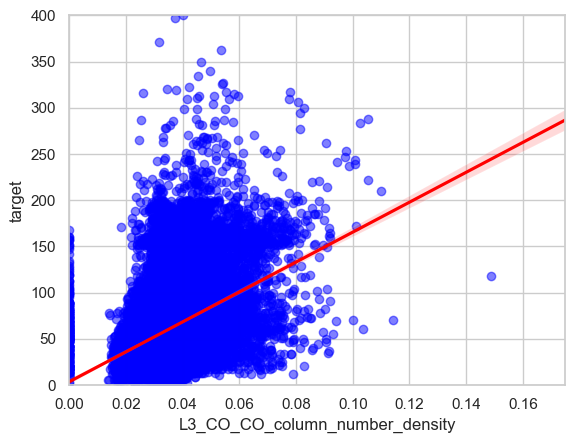

In [80]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

Text(0, 0.5, 'Pollution Index')

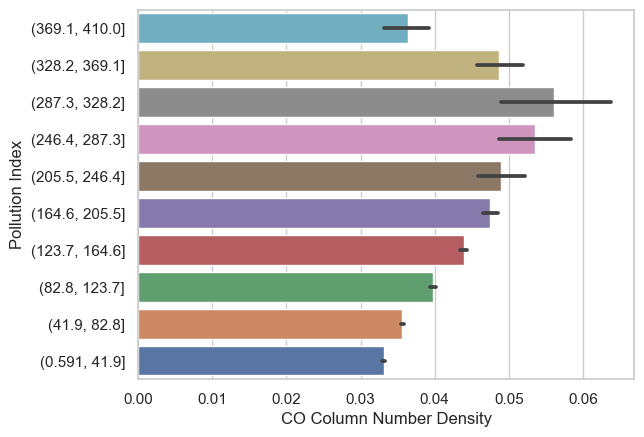

In [81]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()
plt.xlabel('CO Column Number Density')
plt.ylabel('Pollution Index')


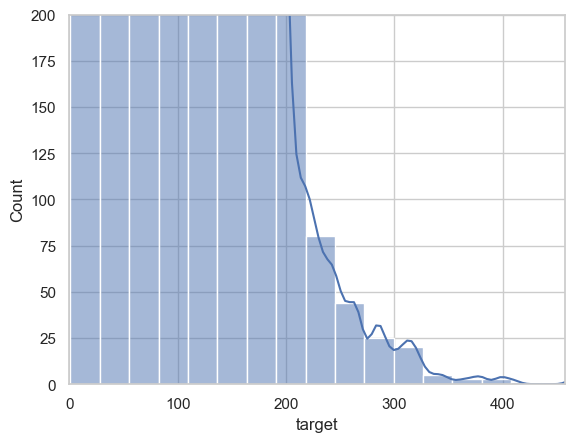

In [82]:
sns.histplot(df, x='target', bins=30, kde=True)
plt.xlim(0, 458)
plt.ylim(0, 200)
plt.show()

- the traget value is increasing until 328.2 with co_column_number_density
- we have less data point above 200 

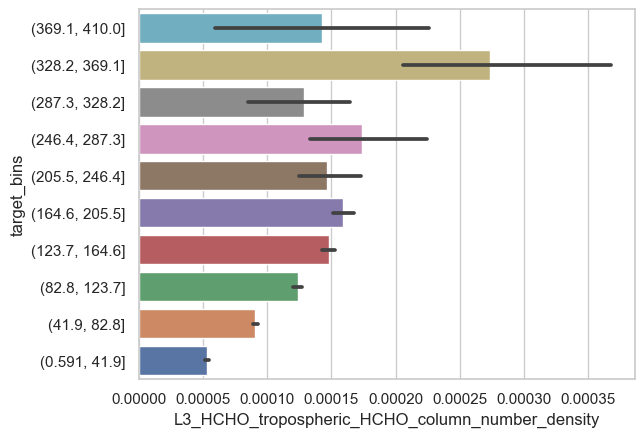

In [83]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_HCHO_tropospheric_HCHO_column_number_density', y='target_bins').invert_yaxis()

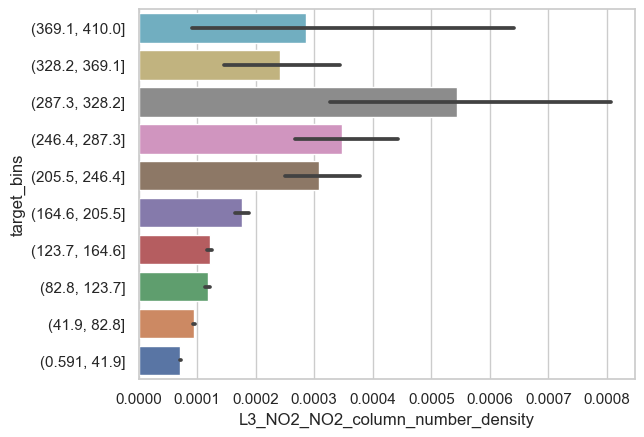

In [84]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_NO2_NO2_column_number_density', y='target_bins').invert_yaxis()

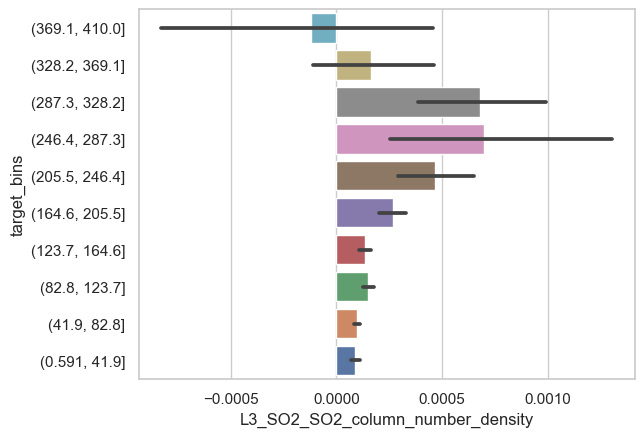

In [85]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_SO2_SO2_column_number_density', y='target_bins').invert_yaxis()

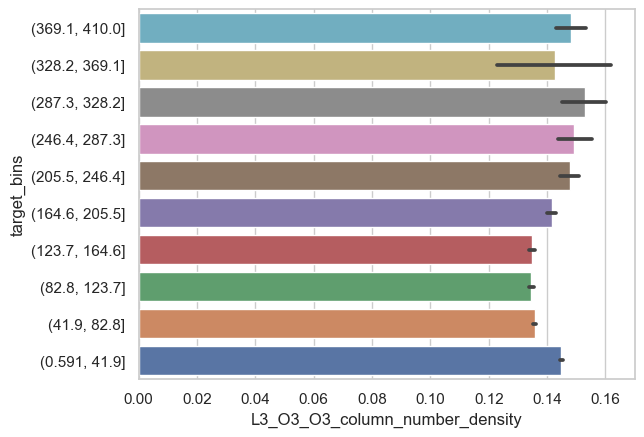

In [86]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_O3_O3_column_number_density', y='target_bins').invert_yaxis()

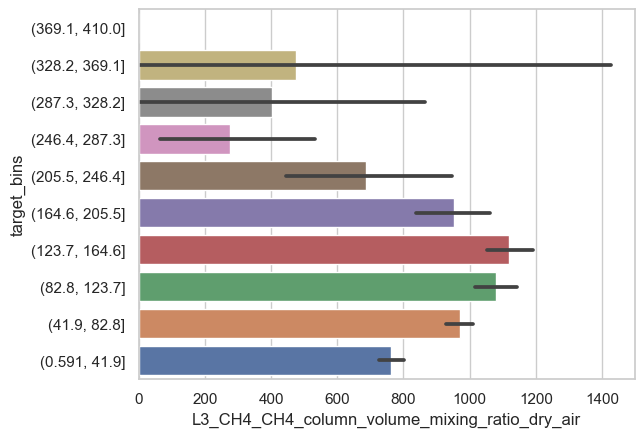

In [87]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CH4_CH4_column_volume_mixing_ratio_dry_air', y='target_bins').invert_yaxis()

Conclusion : H1: higher gas column densities, higher target value: Yes. We look at the data points from 0-200 (afterward it is unreliable)

H2: - Q: higher wind velocity, lower target value?
    A: true

In [88]:
df_abs = df_temp.copy()
df_abs['u_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

Text(0, 0.5, 'Pollution Index')

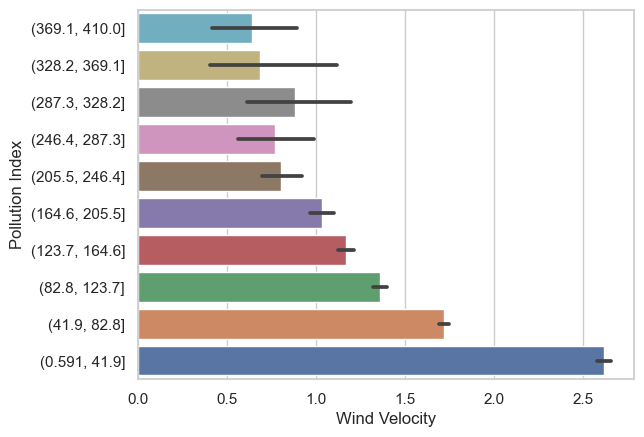

In [89]:
sns.barplot(df_abs, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()
plt.xlabel('Wind Velocity')
plt.ylabel('Pollution Index')


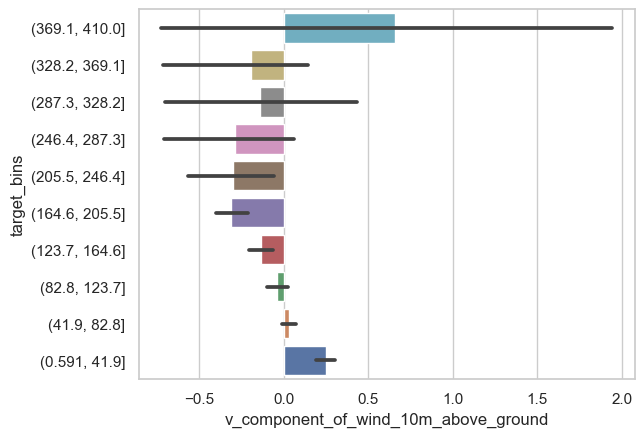

In [90]:
sns.barplot(df_temp, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

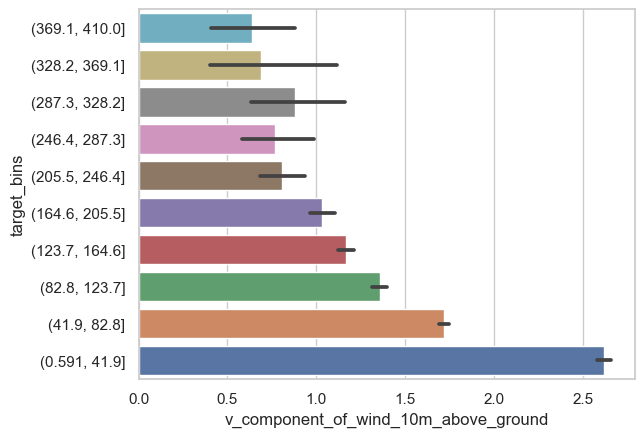

In [91]:
df_abs = df_temp.copy()
df_abs['v_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

sns.barplot(df_abs, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

The more wind the cleaner the air

H3: - humidity correlated non-linearly with target value

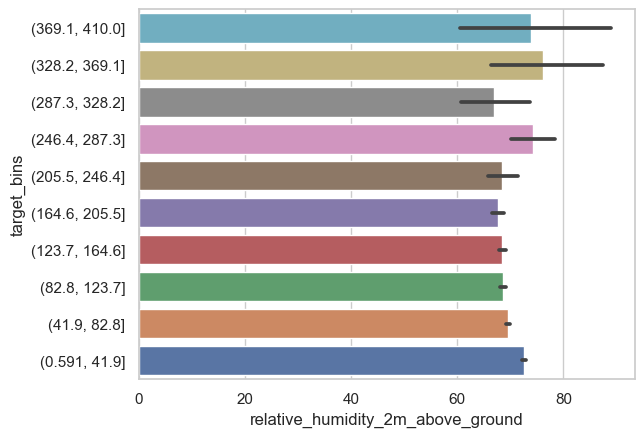

In [92]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
#plt.xlim(60, 100)
#plt.show()

H3
- a small change in humdidity makes a big change in pollution but most humidity values are within each others range (error range), so there is maby no dependency at all


H4: satellite angle correlates with the target value (measured column density)

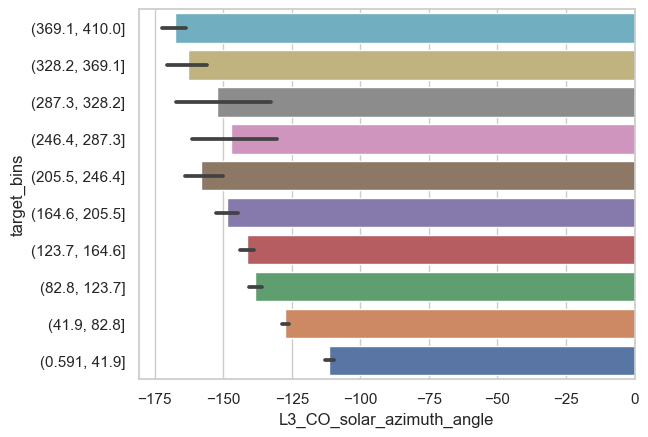

In [93]:
sns.barplot(df_temp, x='L3_CO_solar_azimuth_angle', y='target_bins').invert_yaxis()

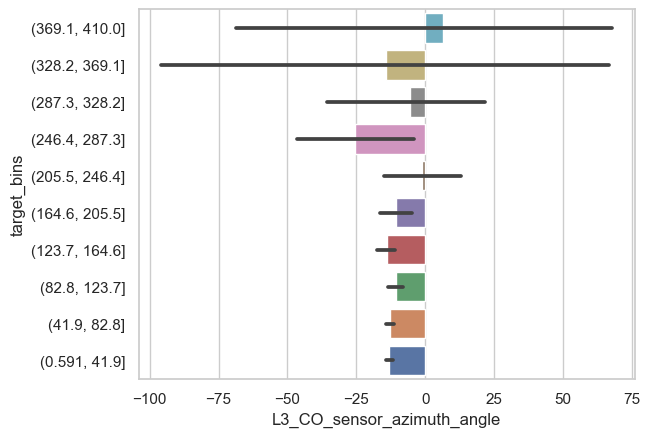

In [94]:
sns.barplot(df_temp, x='L3_CO_sensor_azimuth_angle', y='target_bins').invert_yaxis()


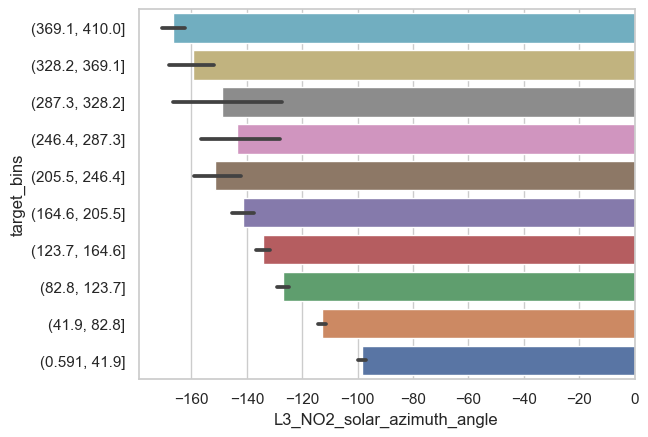

In [95]:
sns.barplot(df_temp, x='L3_NO2_solar_azimuth_angle', y='target_bins').invert_yaxis()

(815000.0, 844553.1211771137)

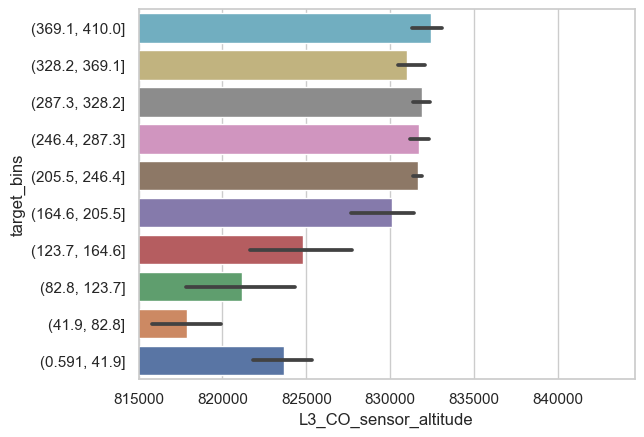

In [96]:
sns.barplot(df_temp, x='L3_CO_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_CO_sensor_altitude'].max())

- solar_azimuth_angle: The pollution seems to depend on the position of the sun and that means the time of the day (?)
- sensor_azimuth_ angle: The pollution seems not depend on the sensor azimuth angle
- sensor_altitude: there is a a non-linear dependency



H5: stratospheric column density no correlation with target value

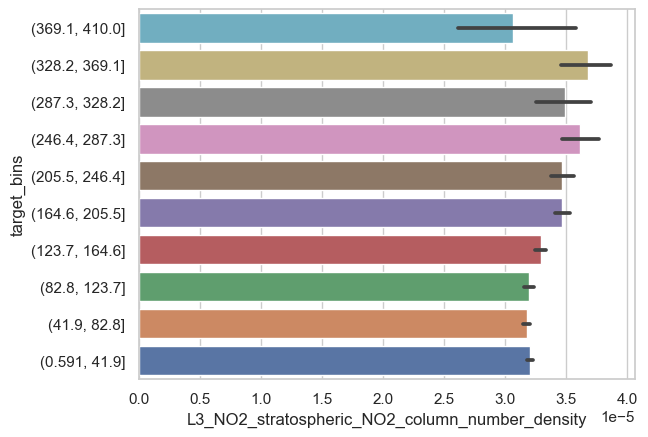

In [97]:
sns.barplot(df_temp, x='L3_NO2_stratospheric_NO2_column_number_density', y='target_bins').invert_yaxis()

- no correlation between target value and stratospheric column density

H6: aerosol index with target value correlation ? 

Text(0, 0.5, 'Pollution Index')

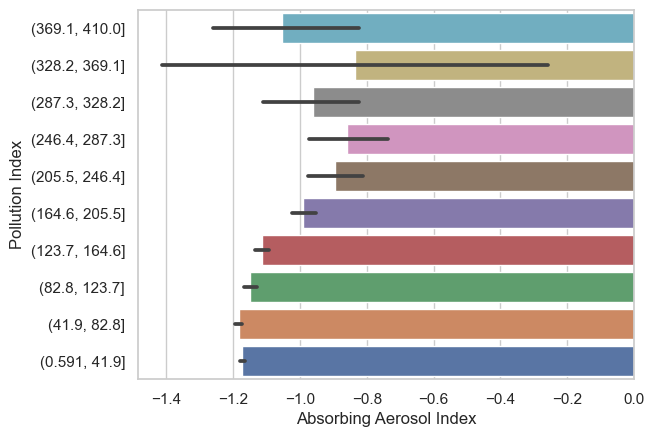

In [98]:
sns.barplot(df_temp, x='L3_AER_AI_absorbing_aerosol_index', y='target_bins').invert_yaxis()
plt.xlabel('Absorbing Aerosol Index')
plt.ylabel('Pollution Index')


- when negativ values = no absorbing aerosol 
- high negativ values of aresol index represent cleaner air. 


H7: AER_AI_sensor_altitude  nega-corr target value

(815000.0, 844493.8976953975)

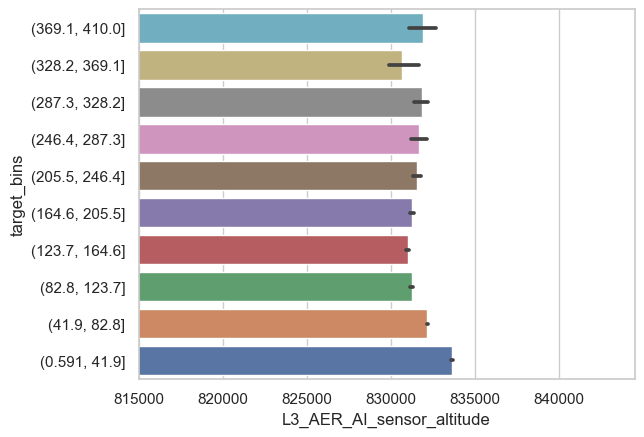

In [99]:
sns.barplot(df_temp, x='L3_AER_AI_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_AER_AI_sensor_altitude'].max())


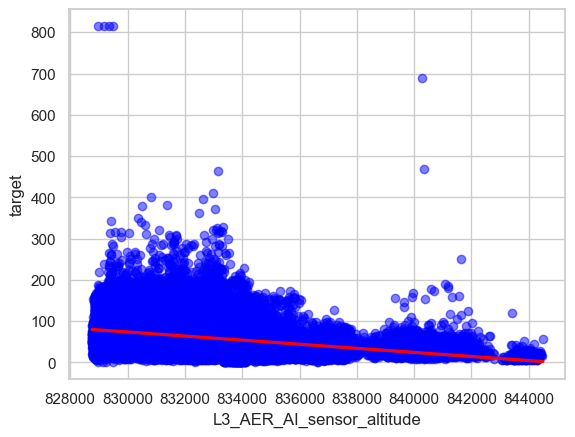

In [100]:
sns.regplot(df, x = 'L3_AER_AI_sensor_altitude', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

plt.show()

Cloud 

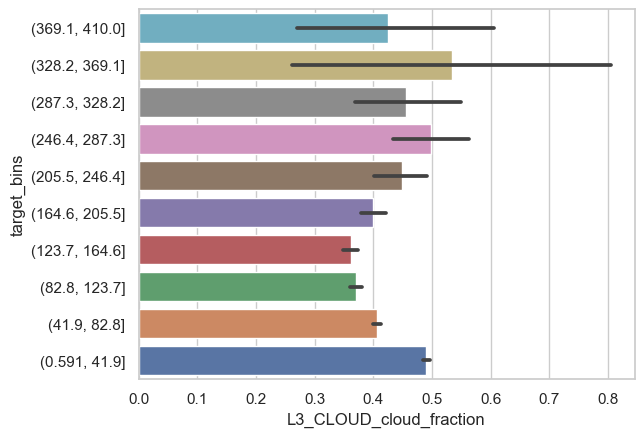

In [101]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_fraction', y='target_bins').invert_yaxis()


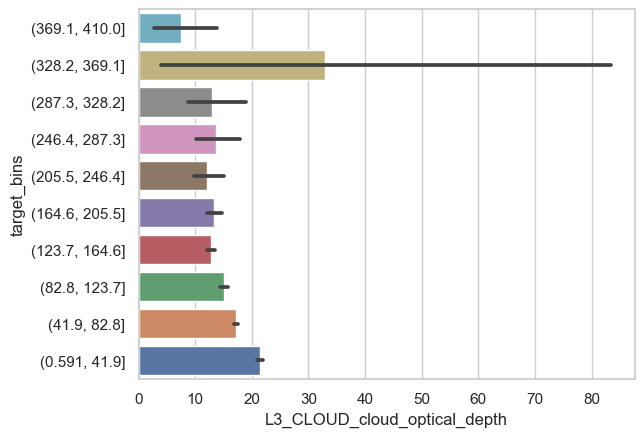

In [102]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_optical_depth', y='target_bins').invert_yaxis()

- the higher could_optical depth the lower the polution


- if we have a lot of clouds we have lower polution 

Summary Results
- polution rises with: 
    - higher gas column number density


- polution decreases with:
    - higher wind velocity
    - later time of day
    - higher negativ absorbing aerosol index
    - higher cloud fraction
    - higher could_optical depth


- unclear relationship between pollution and:
    - humidity
    - sensor azimuth angle
    - sensor altitude 
    - strat. gas column density 
    
    


<Axes: xlabel='Date', ylabel='L3_CO_CO_column_number_density'>

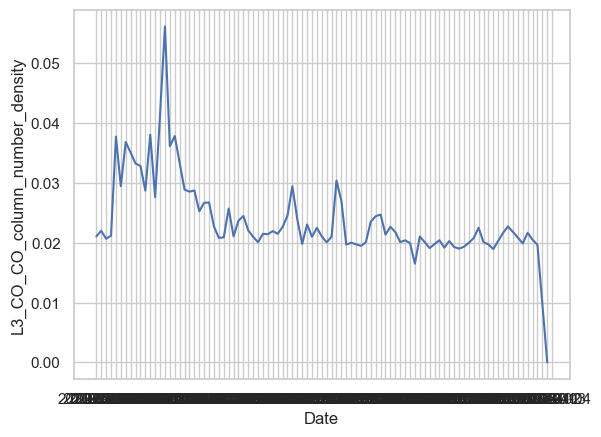

In [103]:
selected_rows = df[df['Place_ID'] == '010Q650']

sns.lineplot(x='Date', y='L3_CO_CO_column_number_density', data=selected_rows)

<Axes: xlabel='Date', ylabel='relative_humidity_2m_above_ground'>

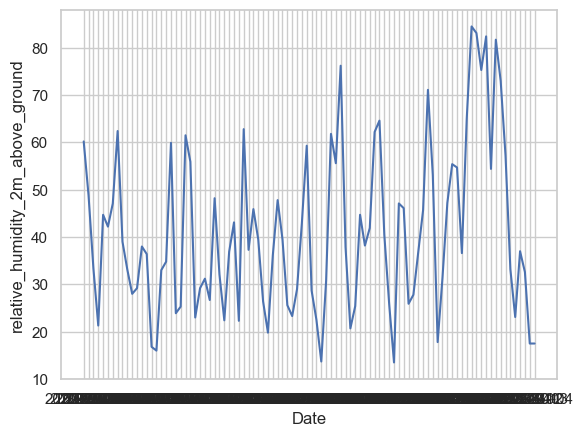

In [104]:
selected_rows = df[df['Place_ID'] == '010Q650']

sns.lineplot(x='Date', y='relative_humidity_2m_above_ground', data=selected_rows)

Date and Target Value

<Axes: xlabel='Date', ylabel='target'>

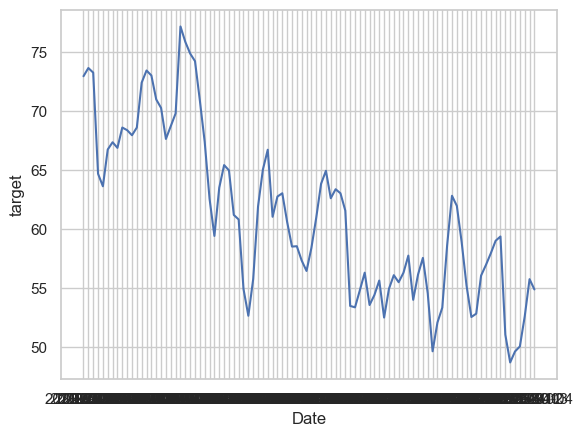

In [105]:
sns.lineplot(df.groupby('Date')['target'].mean().reset_index(), x='Date', y='target')

- we have a decrease in air pollution the later in the year 

Tasks before Modelling 

- Check the rest of the hypothesis
- Explore the missing data 
- Find a good way to  impute the missing data 
- Decide what data to bin or OHE 

Data Cleaning 

In [106]:
df['Date'].isnull().sum()

0

In [107]:
df['Place_ID'].isnull().sum()

0

In [50]:
missing_values = df.isnull().sum()
positive_missing_values = missing_values[missing_values > 0]
print(positive_missing_values)

L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol_index                          2189
L3_NO2_cloud_fraction                                   2189
L3_NO2_sensor_altitude                                  2189
L3_NO2_sensor_azimuth_angle                             2190
L3_NO2_sensor_zenith_angle                              2190
L3_NO2_solar_azimuth_angle                              2190
L3_NO2_solar_zenith_angle                               2190
L3_NO2_stratospheric_NO2_column_number_density          2190
L3_NO2_tropopause_pressure                              2190
L3_NO2_tropospheric_NO2_column_number_density           8669
L3_O3_O3_column_number_density                           283
L3_O3_O3_effective_temperature                           283
L3_O3_cloud_fraction                                     283
L3_O3_sensor_azimuth_angle                               283
L3_O3_sensor_zenith_angl

In [108]:
total_missing_values = df.isnull().sum().sum()
total_elements = df.size

missing_percentage_total = (total_missing_values / total_elements) * 100
print(missing_percentage_total)

15.495311840247375


In [109]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

positive_missing_percentage = missing_percentage[missing_percentage > 0]
pd.DataFrame(positive_missing_percentage).sort_values(by=0, ascending=False)

,0
L3_CH4_solar_zenith_angle,81.045260
L3_CH4_solar_azimuth_angle,81.045260
L3_CH4_sensor_zenith_angle,81.045260
L3_CH4_sensor_azimuth_angle,81.045260
L3_CH4_aerosol_optical_depth,81.045260
...,...
L3_AER_AI_absorbing_aerosol_index,0.644697
L3_AER_AI_sensor_altitude,0.644697
L3_AER_AI_sensor_azimuth_angle,0.644697
L3_AER_AI_sensor_zenith_angle,0.644697


In [110]:
humidity_features = [col for col in df.columns if 'humidity' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in relative_humidity_2m_above_ground: 0.00%
Percentage of missing values in specific_humidity_2m_above_ground: 0.00%


In [111]:
humidity_features = [col for col in df.columns if 'sensor_azimuth_angle' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_azimuth_angle: 7.17%
Percentage of missing values in L3_O3_sensor_azimuth_angle: 0.93%
Percentage of missing values in L3_CO_sensor_azimuth_angle: 17.75%
Percentage of missing values in L3_HCHO_sensor_azimuth_angle: 24.30%
Percentage of missing values in L3_CLOUD_sensor_azimuth_angle: 1.22%
Percentage of missing values in L3_AER_AI_sensor_azimuth_angle: 0.64%
Percentage of missing values in L3_SO2_sensor_azimuth_angle: 23.68%
Percentage of missing values in L3_CH4_sensor_azimuth_angle: 81.05%


In [112]:
humidity_features = [col for col in df.columns if 'sensor_altitude' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_altitude: 7.16%
Percentage of missing values in L3_CO_sensor_altitude: 17.75%
Percentage of missing values in L3_AER_AI_sensor_altitude: 0.64%


In [113]:
all_features = list(df.columns)

# Features to be removed
features_to_remove = [feature for feature in all_features if "CH4" in feature or "stratospheric" in feature or "target" in feature or "sensor_azimuth_angle" in feature or "tropopause" in feature]

# Creating a new list without the specified features
new_features = [feature for feature in all_features if feature not in features_to_remove]
len(new_features)

61

In [114]:
miss = df.groupby('Place_ID')['L3_CO_CO_column_number_density'].apply(lambda x: x.isna().sum())


In [115]:
count = df.groupby('Place_ID')['Date'].count()


In [116]:
percent = (miss/count)*100
percent

Place_ID
010Q650     7.446809
05EC30X     8.888889
0DPWHX8    10.638298
0GBXTHY    53.191489
0HYPV1N     4.255319
             ...    
YLLOKEY    21.276596
YLZOBFW    29.787234
YPXSK14    11.702128
YSIXKFZ    22.340426
YWSFY6Q    15.384615
Length: 340, dtype: float64

In [117]:
new_features

['Place_ID X Date',
 'Date',
 'Place_ID',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_HCHO_slant_col

KeyboardInterrupt: 

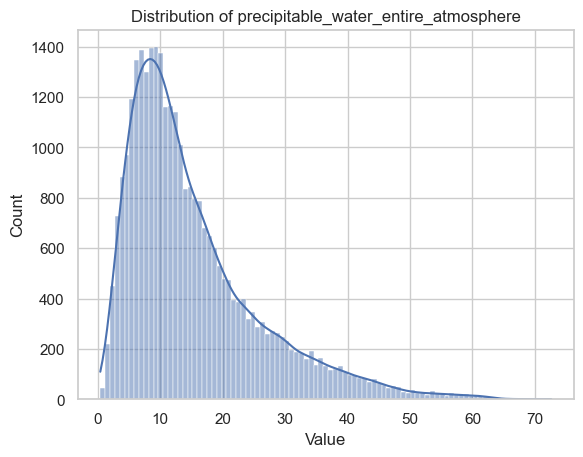

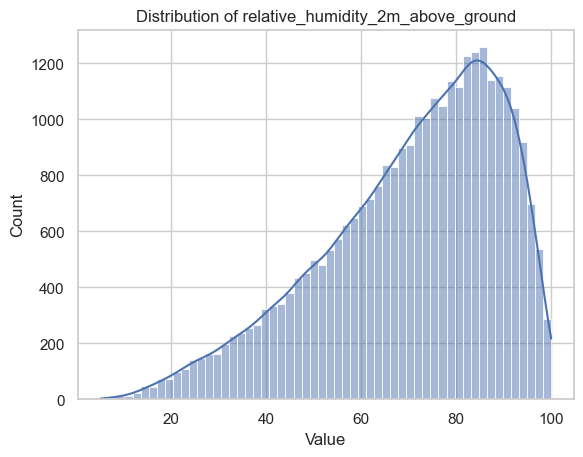

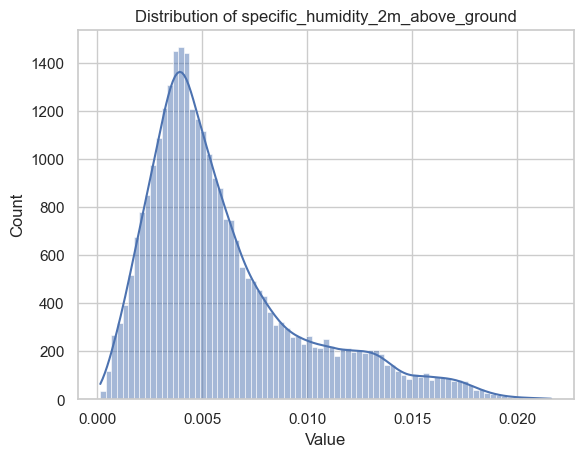

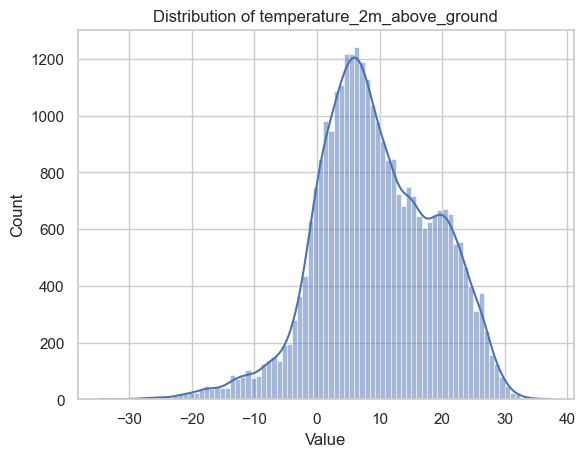

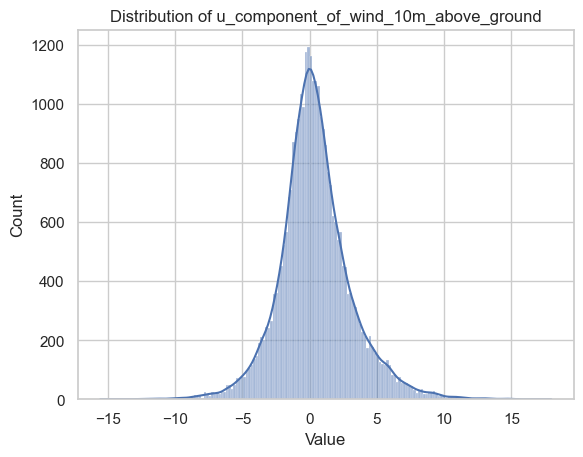

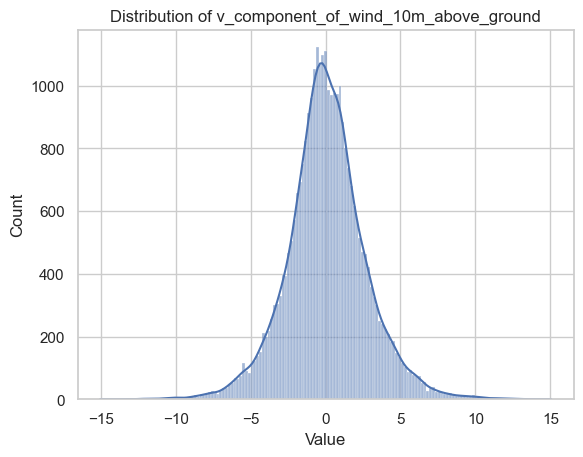

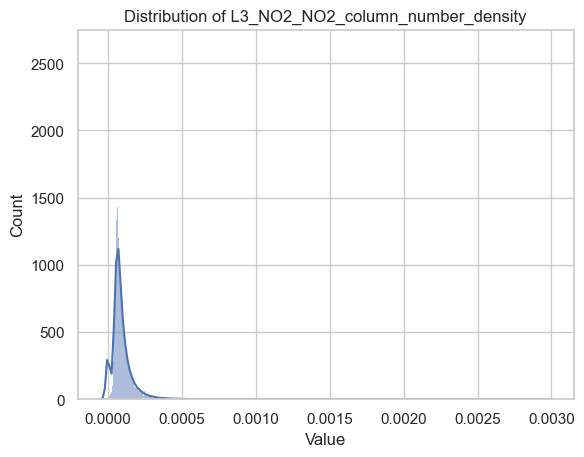

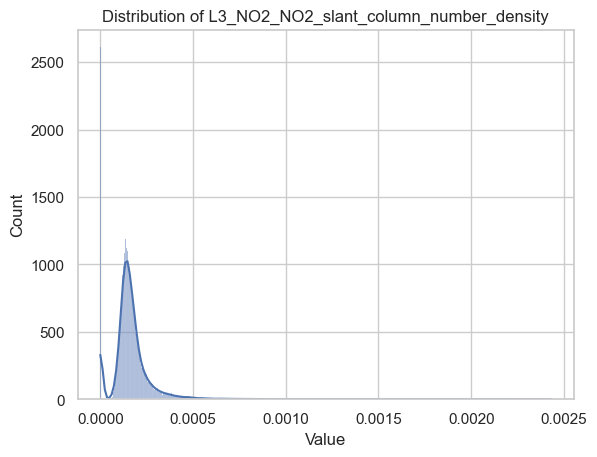

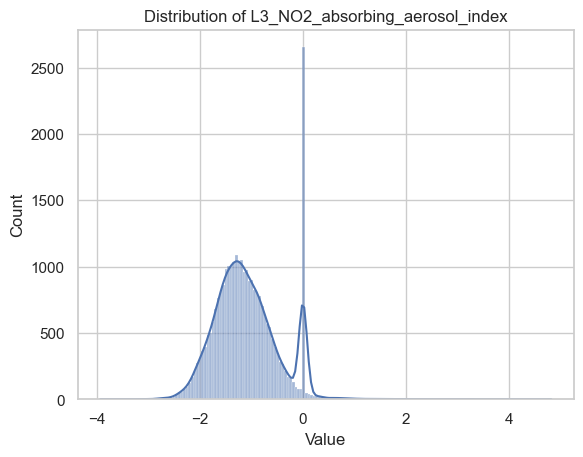

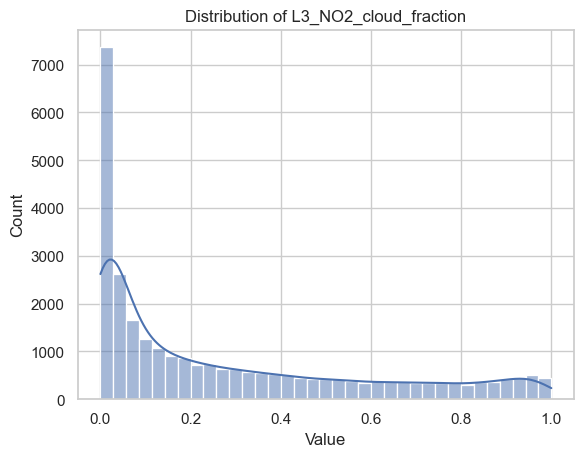

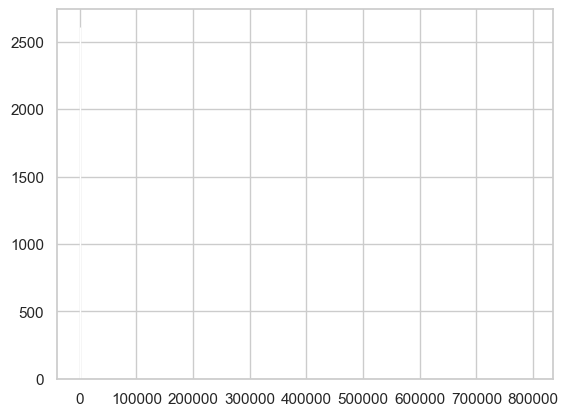

In [118]:

numeric_features = df[new_features].select_dtypes(include=['number'])
sns.set(style="whitegrid")
# Create histograms for each numeric feature
for feature in numeric_features.columns:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=df[new_features], x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
# Show all the histograms
plt.show()



What do want to do
Outliers need to be cutted, 0 in some columns to be changed as NaN 
['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere', no missing value, Standard Scaler
 'relative_humidity_2m_above_ground', no missing value, Standard Scaler
 'specific_humidity_2m_above_ground', no missing value, Standard Scaler
 'temperature_2m_above_ground', no missing value, Standard Scaler
 'u_component_of_wind_10m_above_ground',  no missing value, Standard Scaler (try model with abs value maybe?)
 'v_component_of_wind_10m_above_ground', no missing value, Standard Scaler
 'L3_NO2_NO2_column_number_density', outliers, missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_NO2_slant_column_number_density', outliers, missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_absorbing_aerosol_index', missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_cloud_fraction', missing values, impute KNN(if feature setting possible)
 'L3_NO2_sensor_azimuth_angle', impute and Standard Scaler
 'L3_NO2_sensor_zenith_angle', KNNimpute and Min-Max-Scaler
 'L3_NO2_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_NO2_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_NO2_stratospheric_NO2_column_number_density', *not included
 'L3_NO2_tropopause_pressure', * not included
 'L3_NO2_tropospheric_NO2_column_number_density', KNNimpute and Standard Scaler
 'L3_O3_O3_column_number_density',KNNimpute and Standard Scaler
 'L3_O3_O3_effective_temperature',KNNimpute and Standard Scaler
 'L3_O3_cloud_fraction', KNN impute
 'L3_O3_sensor_azimuth_angle',* not included
 'L3_O3_sensor_zenith_angle', KNNimpute and Min-Max-Scaler
 'L3_O3_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_O3_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_CO_CO_column_number_density',  cut at 0.1, KNNimpute and Standard Scaler,
 'L3_CO_H2O_column_number_density', cut at 5000, KNNimpute and Standard Scaler, 
 'L3_CO_cloud_height', change the values <= 0, KNNimpute and Standard Scaler,
 'L3_CO_sensor_altitude', change the values below , KNNimpute and Standard Scaler,
 'L3_CO_sensor_azimuth_angle', KNNimpute and Standard Scaler, 
 'L3_CO_sensor_zenith_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_CO_solar_azimuth_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_CO_solar_zenith_angle',    KNNimpute and Standard Scaler, 
 'L3_HCHO_HCHO_slant_column_number_density',  KNNimpute and Standard Scaler, 
 'L3_HCHO_cloud_fraction', KNNimpute
 'L3_HCHO_sensor_azimuth_angle', * NOT INDLUCDED
 'L3_HCHO_sensor_zenith_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_HCHO_solar_azimuth_angle', KNNimpute and Min-Max-Scaler, 
 'L3_HCHO_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_HCHO_tropospheric_HCHO_column_number_density', KNNimpute and Standard Scaler
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_base_height', KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_base_pressure', Standard Scaler
 'L3_CLOUD_cloud_fraction', KNNimpute
 'L3_CLOUD_cloud_optical_depth', cutoff at 100(?) KNNimpute KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_top_height'KNNimpute ,Standard Scaler
 'L3_CLOUD_cloud_top_pressure',Standard Scaler
 'L3_CLOUD_sensor_azimuth_angle', * not included
 'L3_CLOUD_sensor_zenith_angle',KNNimpute Min-Max-Scaler 
 'L3_CLOUD_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_CLOUD_solar_zenith_angle', Standard Scaler
 'L3_CLOUD_surface_albedo', Standard Scaler
 'L3_AER_AI_absorbing_aerosol_index', Standard Scaler
 'L3_AER_AI_sensor_altitude', Standard Scaler
 'L3_AER_AI_sensor_azimuth_angle', * not included
 'L3_AER_AI_sensor_zenith_angle', Min-Max-Scaler
 'L3_AER_AI_solar_azimuth_angle', KNNimpute Min-Max-Scaler
 'L3_AER_AI_solar_zenith_angle', Standard Scaler
 'L3_SO2_SO2_column_number_density', KNNimpute and Standard Scaler cutoff value < -0.01 and > 0.01
 'L3_SO2_SO2_column_number_density_amf', KNNimpute and Standard Scaler
 'L3_SO2_SO2_slant_column_number_density', cutoff < -0.002 > 0.002 and KNNimpute and Standard Scaler
 'L3_SO2_absorbing_aerosol_index',KNNimpute and Standard Scaler
 'L3_SO2_cloud_fraction', KNNimpute 
 'L3_SO2_sensor_azimuth_angle',* not included
 'L3_SO2_sensor_zenith_angle',KNNimpute and Min-Max-Scaler
 'L3_SO2_solar_azimuth_angle', KNNimpute and Min-Max-Scaler
 'L3_SO2_solar_zenith_angle',KNNimpute and Standard Scaler
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', * not included
 'L3_CH4_aerosol_height',* not included
 'L3_CH4_aerosol_optical_depth',* not included
 'L3_CH4_sensor_azimuth_angle',* not included
 'L3_CH4_sensor_zenith_angle',* not included
 'L3_CH4_solar_azimuth_angle',* not included
 'L3_CH4_solar_zenith_angle']* not included

In [119]:
# 1. No Missing Value, Apply Standard Scaler:
features_standard_scaler = [
    'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground'
]

# 2. Outliers Present, Missing Values, KNN Impute, Apply Standard Scaler:
features_knn_standard_scaler = [
    'L3_NO2_NO2_column_number_density',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_absorbing_aerosol_index',
    'L3_NO2_sensor_azimuth_angle',
    'L3_NO2_solar_azimuth_angle',
    'L3_NO2_solar_zenith_angle',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_O3_solar_azimuth_angle',
    'L3_O3_solar_zenith_angle',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_CO_cloud_height',
    'L3_CO_sensor_altitude',
    'L3_CO_sensor_azimuth_angle',
    'L3_CO_solar_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_solar_zenith_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_base_height',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_height',
    'L3_SO2_SO2_column_number_density',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_solar_zenith_angle',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_solar_zenith_angle',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_absorbing_aerosol_index',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_zenith_angle',
    'L3_SO2_SO2_column_number_density_amf'
]

# 3. Only KNN Impute:
features_knn_only = [
    'L3_NO2_cloud_fraction',
    'L3_O3_cloud_fraction',
    'L3_HCHO_cloud_fraction',
    'L3_CLOUD_cloud_fraction'
]

# 4. KNN Impute and Apply Min-Max Scaler:
features_knn_minmax = [
    'L3_NO2_sensor_zenith_angle',
    'L3_O3_sensor_zenith_angle',
    'L3_CO_sensor_zenith_angle',
    'L3_CO_solar_azimuth_angle',
    'L3_HCHO_sensor_zenith_angle',
    'L3_HCHO_solar_azimuth_angle',
    'L3_CLOUD_sensor_zenith_angle',
    'L3_AER_AI_sensor_zenith_angle',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_sensor_zenith_angle',
    'L3_SO2_solar_azimuth_angle'
]


Feature Engineering
<a id='feature_engineering'/>

In [121]:
features=df[features_standard_scaler + features_knn_standard_scaler + features_knn_only + features_knn_minmax]
target=df['target']

In [123]:
features_place = features.copy()
features_place['Place_ID'] = df['Place_ID']
features_place.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_sensor_azimuth_angle,...,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,Place_ID
0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,76.537512,...,38.622451,-61.789016,38.593017,-61.752587,38.593017,38.634284,-61.736719,38.593017,-61.752587,010Q650
1,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,-14.708036,...,61.402626,-74.457583,59.624912,-67.693509,59.624912,59.624912,-67.693509,59.624912,-67.693509,010Q650
2,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,-105.201338,...,49.924556,-78.355069,49.839714,-78.342701,49.839714,49.839714,-78.342701,49.839714,-78.342701,010Q650
3,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,-104.334056,...,29.214970,-73.914571,29.181258,-73.896588,29.181258,29.180977,-73.896572,29.181258,-73.896588,010Q650
4,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,58.850179,...,1.389085,-68.622851,0.797294,-68.612480,0.797294,0.797294,-68.612480,0.797294,-68.612480,010Q650


In [83]:
features.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_sensor_azimuth_angle,...,L3_O3_sensor_zenith_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle
0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,76.537512,...,38.593017,38.622451,-61.789016,38.593017,-61.752587,38.593017,38.634284,-61.736719,38.593017,-61.752587
1,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,-14.708036,...,59.624912,61.402626,-74.457583,59.624912,-67.693509,59.624912,59.624912,-67.693509,59.624912,-67.693509
2,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,-105.201338,...,49.839714,49.924556,-78.355069,49.839714,-78.342701,49.839714,49.839714,-78.342701,49.839714,-78.342701
3,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,-104.334056,...,29.181258,29.214970,-73.914571,29.181258,-73.896588,29.181258,29.180977,-73.896572,29.181258,-73.896588
4,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,58.850179,...,0.797294,1.389085,-68.622851,0.797294,-68.612480,0.797294,0.797294,-68.612480,0.797294,-68.612480


Pipelines :)

In [124]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [125]:
df2=df[df['target']<0.8*df['target'].max()]
df2.shape
df3=df2[abs(df2['L3_CLOUD_cloud_optical_depth'])<100]
df3.shape
df4=df3[abs(df3['L3_CO_CO_column_number_density'])<0.1]
df5=df4[abs(df4['L3_CO_H2O_column_number_density'])<5000]
df6=df5[abs(df5['L3_SO2_SO2_column_number_density'])<0.01]
df7=df6[abs(df6['L3_SO2_SO2_slant_column_number_density'])<0.002]




In [126]:
df7.shape
features=df7[features_standard_scaler + features_knn_standard_scaler + features_knn_only + features_knn_minmax]
target=df7['target']

In [128]:
features_place = features.copy()
features_place['Place_ID'] = df7['Place_ID']
len(features_place)

20352

In [129]:
target.shape

(20352,)

In [249]:
    # Sub - Pipelines

    pipeline_standard_Scaler     = Pipeline([
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])

    pipeline_standard_Scaler_knn = Pipeline([
                                            ( 'imputer',         KNNImputer()     ),
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])


    pipeline_knn                = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ])


    pipeline_knn_and_minmax     = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ( 'minmax',          MinMaxScaler()   ),
                                            ]) 

    # Column Transformer


    my_column_transfomer        = ColumnTransformer([
                                                    ( 'standardscale',               pipeline_standard_Scaler,       features_standard_scaler     ),
                                                    ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   features_knn_standard_scaler ),
                                                    ( 'KNNimpute',                   pipeline_knn,                   features_knn_only            ),
                                                    ( 'KNNimpute_and_MinMaxScale',   pipeline_knn_and_minmax,        features_knn_minmax          ),
                                                    ], remainder='drop')

    model1= RandomForestRegressor()
    model2= xgb.XGBRegressor(objective ='reg:squarederror')
    model3= lgb.LGBMRegressor()
    
    voting_model= VotingRegressor(estimators= [
                                              ('rf',  model1 ),
                                              ('xgb', model2 ),
                                              ('lgb', model3 ),          
                                              ]
                                 )
    stacking_model= StackingRegressor(estimators= [
                                              ('rf',  model1 ),
                                              ('xgb', model2 ),
                                              ('lgb', model3 ),          
                                              ],
                                      final_estimator=LinearRegression()
                                 )
    
    # Main Pipeline

    pipeline_model              = Pipeline([
                                           ('ct',      my_column_transfomer    ),                                                                  
                                           ('v_model', voting_model            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])

    pipeline_model_stack        = Pipeline([
                                           ('ct',      my_column_transfomer      ),                                                                  
                                           ('v_model', stacking_model            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])
    

# Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=None, random_state=777, test_size=0.2)



In [250]:
X_train.shape

(16281, 57)

In [251]:
y_train.shape

(16281,)

In [252]:
pipeline_model.fit(X_train, y_train)
pipeline_model.score(X_test, y_test)

KeyboardInterrupt: 

In [129]:
cross_val_score(pipeline_model, X_train, y_train, n_jobs=-1, cv=5)

array([0.67802497, 0.67032259, 0.68735403, 0.67344592, 0.64287972])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.379934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13025, number of used features: 57
[LightGBM] [Info] Start training from score 64.191340
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13024, number of used features: 57
[LightGBM] [Info] Start training from score 63.787009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.347911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13025, number of used features: 57
[LightGBM] [Info] Star

In [253]:
pipeline_model_stack.fit(X_train, y_train)
pipeline_model_stack.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 16281, number of used features: 57
[LightGBM] [Info] Start training from score 64.014354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13024, number of used features: 57
[LightGBM] [Info] Start training from score 63.787009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13025, number of used features: 57
[LightGBM] [Info] Star

0.6808605659705028

In [248]:


#y_pred = pipeline_model.predict(X_test)

In [ ]:
#learning rate
#n estimators
#num leaves


In [254]:
#pipeline_model.get_params()

In [120]:
# Define hyperparameters for GridSearch
param_grid = {
    'model__n_estimators': [90,110],
}

grid_search = GridSearchCV(pipeline_model, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 16281, number of used features: 57
[LightGBM] [Info] Start training from score 64.014354
Best parameters found:  {'model__n_estimators': 110}


In [121]:
grid_search.best_score_

0.6461769530474162

Let's plot some results

In [141]:
pd.set_option('display.max_rows',10)

In [255]:
df7['pred_target_stack']=pipeline_model_stack.predict(features)

In [166]:
#pd.melt(df7[df7['Place_ID']=='010Q650'][['Date','target','pred_target_stack']], ['Date'])

In [259]:



r2_test  = r2_score(y_test, pipeline_model_stack.predict(X_test))
r2_train = r2_score(y_train, pipeline_model_stack.predict(X_train))
# Print the R2 score
print(f"Test R2 Score: {r2_test}")
print(f"Train R2 Score: {r2_train}")

Test R2 Score: 0.6808605659705028
Train R2 Score: 0.9059620906590694


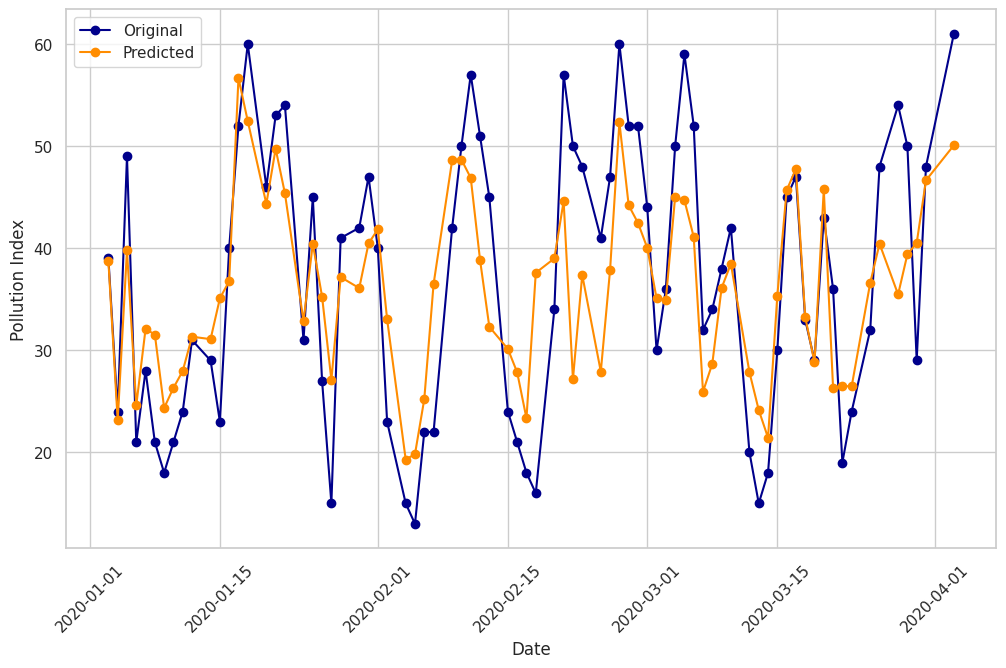

<Figure size 640x480 with 0 Axes>

In [350]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df7[df7['Place_ID']=='010Q650']# Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Pollution Index')
plt.legend()
plt.show()

plt.savefig('one_place.png')

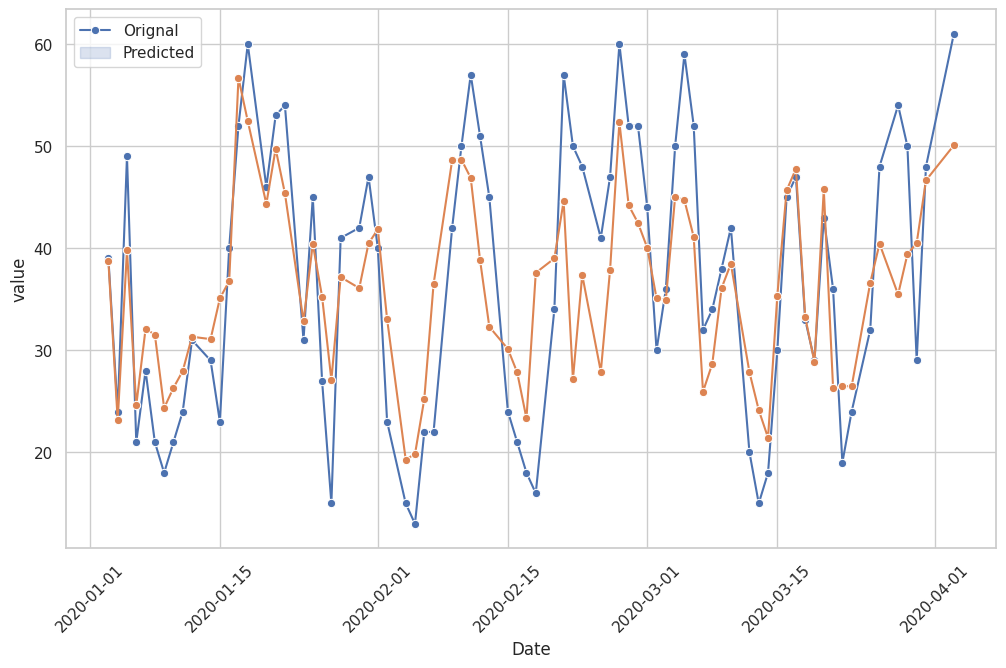

In [278]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=pd.melt(df7[df7['Place_ID']=='010Q650'][['Date','target','pred_target_stack']], ['Date']), x='Date', y='value', hue='variable', marker='o')
plt.legend(['Orignal', 'Predicted'])
plt.xticks(rotation=45)
plt.show()


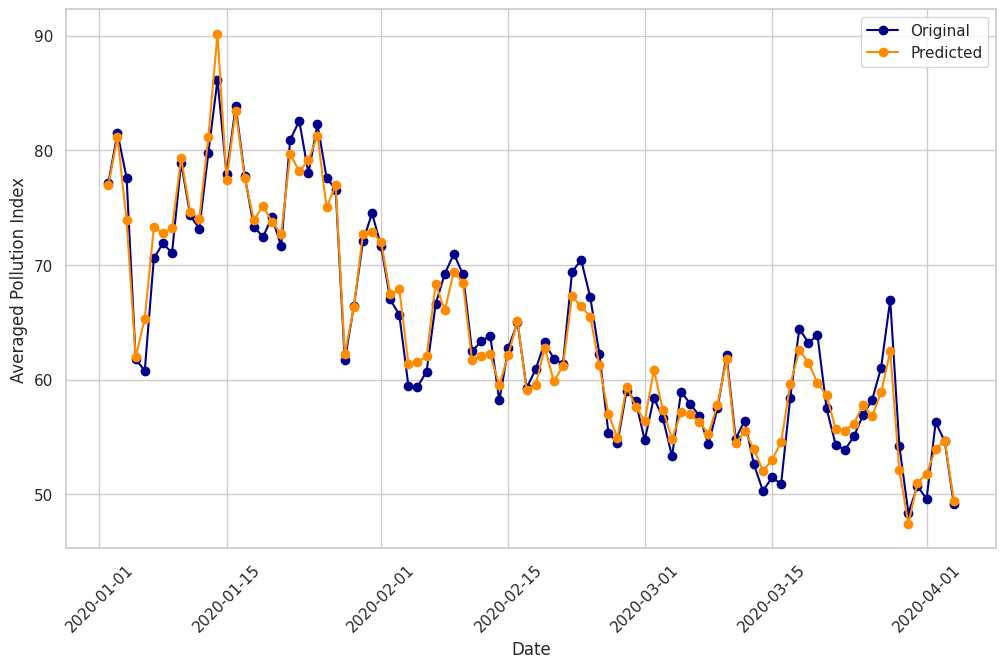

In [298]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df7.select_dtypes(include=['number', 'datetime64[ns]']).groupby('Date')[['target','pred_target_stack']].mean().reset_index() # Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()

plt.savefig('av_over_all_ci.png')

In [296]:
df7.select_dtypes(include=['number', 'datetime64[ns]']).groupby('Date')[['target','pred_target_stack']].mean().reset_index()

,Date,target,pred_target_stack
0,2020-01-02,77.180233,76.976861
1,2020-01-03,81.513472,81.134337
2,2020-01-04,77.614213,73.926034
3,2020-01-05,61.785500,61.925822
4,2020-01-06,60.762687,65.319043
...,...,...,...
89,2020-03-31,50.706393,50.986594
90,2020-04-01,49.562326,51.775661
91,2020-04-02,56.281915,53.932067
92,2020-04-03,54.590753,54.662265


In [299]:
df7.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [348]:

df8=df7.copy()

df8['bin_L3_CO_CO_column_number_density']=pd.cut(df7['L3_CO_CO_column_number_density'],bins=10, labels=[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095]  )


df8.groupby('bin_L3_CO_CO_column_number_density')[['target','pred_target_stack']].mean().reset_index()


,bin_L3_CO_CO_column_number_density,target,pred_target_stack
0,0.005,54.590753,54.662265
1,0.015,28.272941,26.901993
2,0.025,48.597465,47.542745
3,0.035,55.262286,54.433481
4,0.045,87.127709,89.076772
5,0.055,106.141258,109.480356
6,0.065,111.455508,113.899095
7,0.075,126.029940,129.405017
8,0.085,151.304348,156.314933
9,0.095,148.450000,150.514482


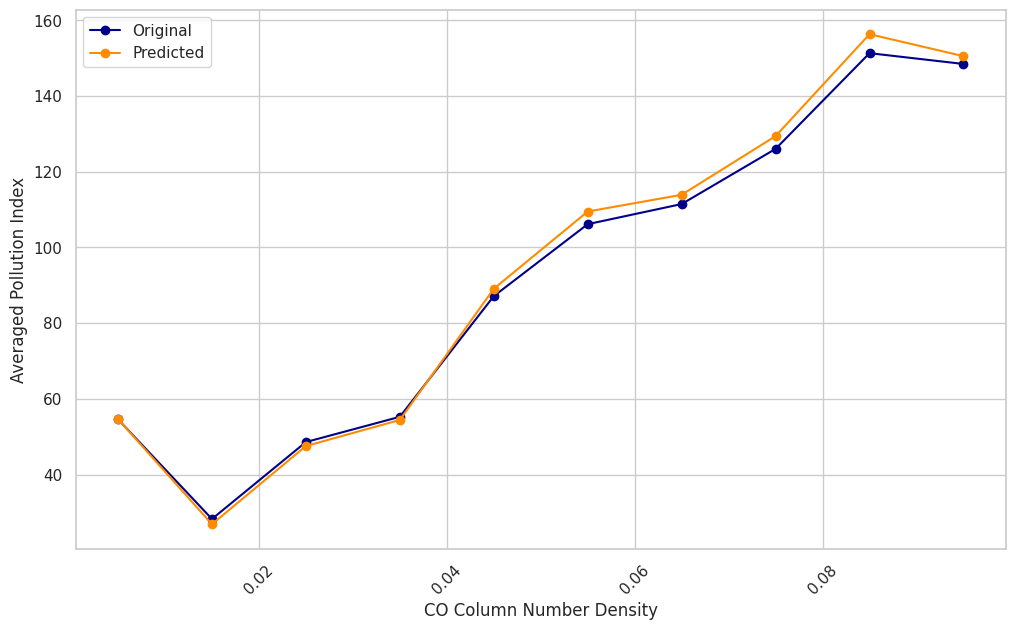

In [349]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df8.groupby('bin_L3_CO_CO_column_number_density')[['target','pred_target_stack']].mean().reset_index()
plt.plot(data['bin_L3_CO_CO_column_number_density'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['bin_L3_CO_CO_column_number_density'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('CO Column Number Density')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()

In [137]:
   # Sub - Pipelines

pipeline_standard_Scaler     = Pipeline([
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])

pipeline_standard_Scaler_knn = Pipeline([
                                            ( 'imputer',         KNNImputer()     ),
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])


pipeline_knn                = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ])


pipeline_knn_and_minmax     = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ( 'minmax',          MinMaxScaler()   ),
                                            ]) 
   
place_id_encoder = Pipeline([
    ('encoder', OneHotEncoder())
])
    # Column Transformer


my_column_transfomer        = ColumnTransformer([
                                                    ( 'standardscale',               pipeline_standard_Scaler,       features_standard_scaler     ),
                                                    ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   features_knn_standard_scaler ),
                                                    ( 'KNNimpute',                   pipeline_knn,                   features_knn_only            ),
                                                    ( 'KNNimpute_and_MinMaxScale',   pipeline_knn_and_minmax,        features_knn_minmax          ),
                                                    ('Place_ID', place_id_encoder, ['Place_ID']) 
                                                    ], remainder='drop')

model1= RandomForestRegressor()
model2= xgb.XGBRegressor(objective ='reg:squarederror')
model3= lgb.LGBMRegressor()
    
stacking_model= StackingRegressor(estimators= [
                                              ('rf',  model1 ),
                                              ('xgb', model2 ),
                                              ('lgb', model3 ),          
                                              ],
                                      final_estimator=LinearRegression()
                                 )
    
    # Main Pipeline

pipeline_model_stack        = Pipeline([
                                           ('ct',      my_column_transfomer      ),                                                                  
                                           ('v_model', stacking_model            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])
    

# Split Data
X_train, X_test, y_train, y_test = train_test_split(features_place, target, stratify=None, random_state=777, test_size=0.2)

In [138]:
pipeline_model_stack.fit(X_train, y_train)
pipeline_model_stack.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15205
[LightGBM] [Info] Number of data points in the train set: 16281, number of used features: 392
[LightGBM] [Info] Start training from score 64.014354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15193
[LightGBM] [Info] Number of data points in the train set: 13024, number of used features: 386
[LightGBM] [Info] Start training from score 63.787009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15193
[LightGBM] [Info] Number of data points in the train set: 13025, number of used features: 386
[LightGBM] [Info] S

0.7572643019204637

In [140]:
df10 = df7.copy()
df10['pred_target_stack']=pipeline_model_stack.predict(features_place)

In [141]:
r2_test  = r2_score(y_test, pipeline_model_stack.predict(X_test))
r2_train = r2_score(y_train, pipeline_model_stack.predict(X_train))
# Print the R2 score
print(f"Test R2 Score: {r2_test}")
print(f"Train R2 Score: {r2_train}")

Test R2 Score: 0.7572643019204637
Train R2 Score: 0.8585611812664076


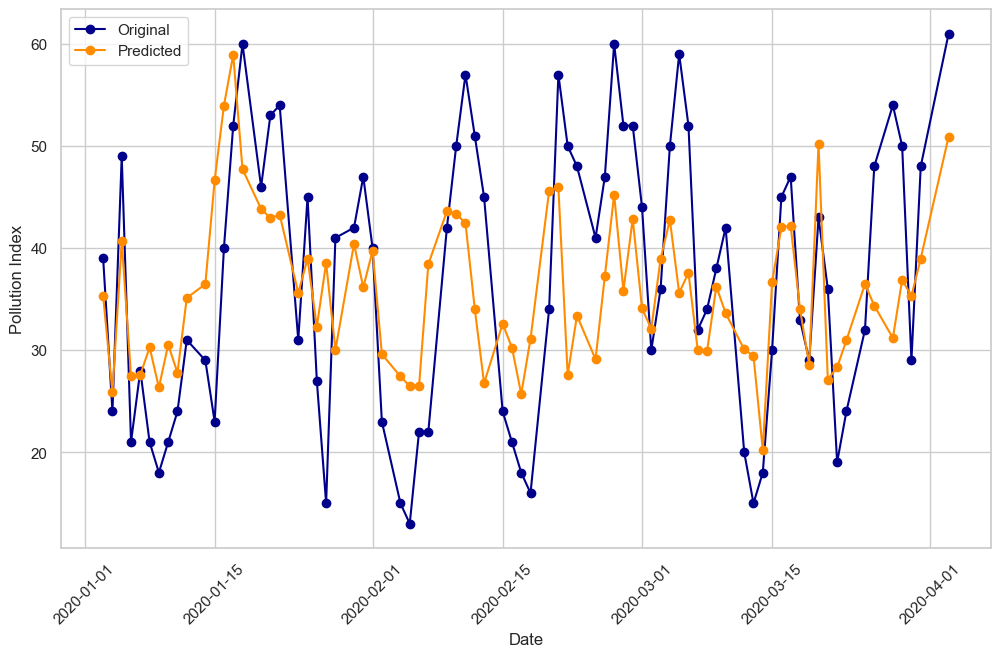

<Figure size 640x480 with 0 Axes>

In [143]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df10[df10['Place_ID']=='010Q650']# Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Pollution Index')
plt.legend()
plt.show()

plt.savefig('one_place.png')

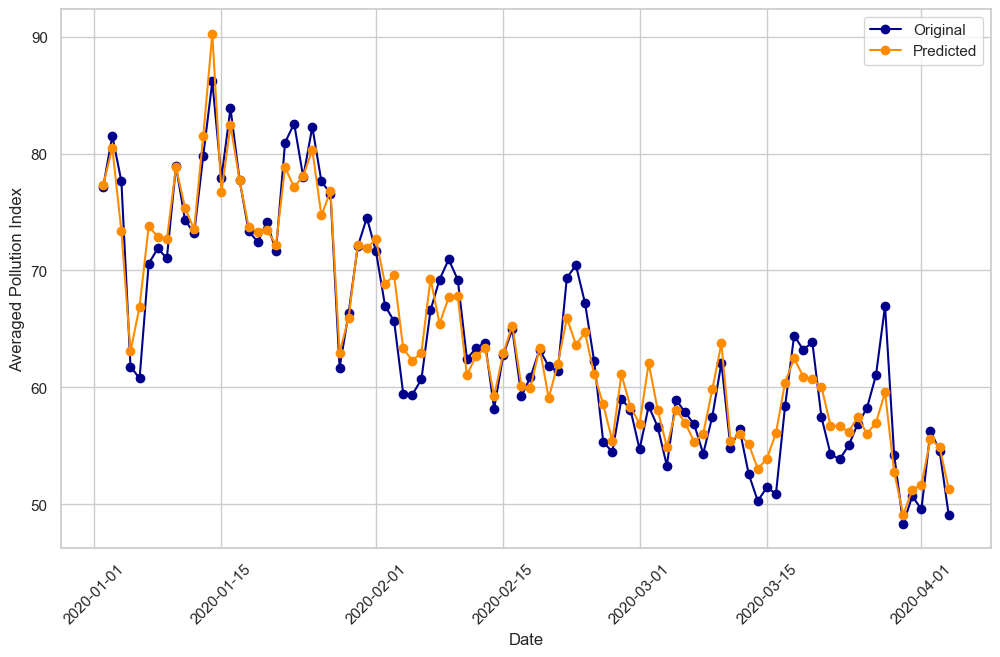

<Figure size 640x480 with 0 Axes>

In [144]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df10.select_dtypes(include=['number', 'datetime64[ns]']).groupby('Date')[['target','pred_target_stack']].mean().reset_index() # Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()

plt.savefig('av_over_all_ci.png')